## Identify broken links

In [1]:
import numpy as np
import pandas as pd
import xlrd
import requests
import time

from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.chrome.options import Options
import json

/Users/dineshpandiyan/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
df = pd.read_excel('/Users/dineshpandiyan/Desktop/Defects/Lexus_links.xlsx', sheet_name = 0)
#filename = time.strftime("%Y%m%d")
f1 = open('/Users/dineshpandiyan/Desktop/Defects/Broken_links.csv', 'a')

try:
    for col in df.columns:
        for val in df[col]:
            r = requests.get(val)
            if r.status_code!= 200:
                print(val,r.status_code)
                status = str(r.status_code)
                #f1.write("\r\n url:" + val + " status:" + status)
                f1.write("\r\n" + val + "," + status)
except:
    pass

f1.close()

https://www.lexus.com.au/news/unveiling-landmark-by-lexus 404
http://www.lexus.com.au/about-lexus/news/10-years-of-f 404
http://www.lexus.com.au/about-lexus/news/emil-frey-lexus 404
http://www.lexus.com.au/about-lexus/news/lexus-melbourne-cup-continues-world-tour 404
http://www.lexus.com.au/about-lexus/news/lexus-melbourne-cup-tour-commemorates-historic-win 404
http://www.lexus.com.au/about-lexus/news/lexus-unveils-striking-lfa-art-car 404
http://www.lexus.com.au/about-lexus/news/Record-first-half-for-Lexus-SUV-sales 404
http://www.lexus.com.au/about-lexus/news/vrc-launch-2018 404
http://www.lexus.com.au/about-lexus/partnerships/lexus-design-award 404
http://www.lexus.com.au/connectivity. 404
http://www.lexus.com.au/connectivity/EditorPage.aspx 404
http://www.lexus.com.au/connectivity/enquiries@lexusenquiries.com.au 404
http://www.lexus.com.au/connectivity/lexus.com.au/connectivity 404
http://www.lexus.com.au/connectivity/lexus.com.au/privacy 404
http://www.lexus.com.au/connectivity/te

## Capture network message & page load time

In [13]:
def get_perf_log_on_load(url, headless = True, filter = None):

    # init Chrome driver
    options = Options()
    options.headless = headless
    cap = DesiredCapabilities.CHROME
    
    # set logging preference
    cap['goog:loggingPrefs'] = {'performance': 'ALL'}
    driver = webdriver.Chrome(executable_path='/Users/dineshpandiyan/Downloads/chromedriver',desired_capabilities = cap, options = options)
    driver.get(url)
    if filter: log = [item for item in driver.get_log('performance')
                      if filter in str(item)]
    else: log = driver.get_log('performance')
        
    # Use Navigation Timing  API to calculate the timings  
    navigationStart = driver.execute_script("return window.performance.timing.navigationStart")
    responseStart = driver.execute_script("return window.performance.timing.responseStart")
    domComplete = driver.execute_script("return window.performance.timing.domComplete")

    # Calculate the performance
    global backendPerformance_calc
    global frontendPerformance_calc
    
    backendPerformance_calc = responseStart - navigationStart
    frontendPerformance_calc = domComplete - responseStart
    
    driver.close()
    return log

with open('/Users/dineshpandiyan/Desktop/Defects/Network_results1.csv','a') as f3, open('/Users/dineshpandiyan/Desktop/Defects/page_load1.csv','a') as f5:

    for col in df.columns: 
        for val in df[col]: 
            x = get_perf_log_on_load(val) 
            #x = get_perf_log_on_load('https://www.lexus.com.au/') 
            length = len(x) 
            total = backendPerformance_calc+frontendPerformance_calc
            f5.write("\r\n" + val + "," + str(backendPerformance_calc/1000)+ "," + str(frontendPerformance_calc/1000)+"," + str(total/1000))
            for i in range(length): 
                #print("PARENT URL: ", val) 
                page_dict = json.dumps(x[i]) 
                json_decode = json.loads(page_dict) 
                new_json = json_decode['message'] 
                new_j = json_decode.get("message") 
                json_decode2 = json.loads(new_j) 
                #print(json_decode2)

                try: 
                    URL = str(json_decode2['message']['params']['response']['url'])
                    Status = str(json_decode2['message']['params']['response']['status'])
                    f3.write("\r\n"+ val +"," + URL + "," + Status)
                    print("URL:", json_decode2['message']['params']['response']['url'], "-----Response Code:", json_decode2['message']['params']['response']['status']) 
                except KeyError: 
                    continue

URL: https://www.lexus.com.au/news/unveiling-landmark-by-lexus -----Response Code: 404
URL: https://www.lexus.com.au/layouts/system/VisitorIdentification.js -----Response Code: 200
URL: https://www.lexus.com.au/bundles/lexus/mainsite/polyfills.js?v=RcWHNPnXwLYNoRRc9li1jK5gVZ7KeiBzaNqspRZohNI1 -----Response Code: 200
URL: https://www.lexus.com.au/bundles/lexus/mainsite/js-head.js?v=WClWo3CxTJRTHZwVRPijy70pdnVM2TuSM8wuCSD6nYw1 -----Response Code: 200
URL: https://www.lexus.com.au/bundles/lexus/mainsite/lazy.js?v=ZESUtjlkTqB95lfQfH9mM-LycdkGVdY1jJH3cHVrQk41 -----Response Code: 200
URL: https://www.lexus.com.au/bundles/lexus/mainsite/core.css?v=KprPDRNjS5jeD7dTuR7m3G-dFAO9PC36RVOvhXYIISM1 -----Response Code: 200
URL: https://www.lexus.com.au/bundles/lexus/mainsite/javascript-lib-min.js?v=g63gB5OjbUv4BZVbyk0YPdHoSDlZA6792T6QrbjAqCo1 -----Response Code: 200
URL: https://hello.myfonts.net/count/2c2817 -----Response Code: 200
URL: https://www.lexus.com.au/bundles/lexus/mainsite/javascript-lib-

URL: data:, -----Response Code: 200
URL: https://www.lexus.com.au/ -----Response Code: 200
URL: https://www.lexus.com.au/bundles/lexus/mainsite/lazy.js?v=ZESUtjlkTqB95lfQfH9mM-LycdkGVdY1jJH3cHVrQk41 -----Response Code: 200
URL: https://www.lexus.com.au/bundles/lexus/mainsite/core.css?v=KprPDRNjS5jeD7dTuR7m3G-dFAO9PC36RVOvhXYIISM1 -----Response Code: 200
URL: https://www.lexus.com.au/layouts/system/VisitorIdentification.js -----Response Code: 200
URL: https://www.lexus.com.au/bundles/lexus/mainsite/typescript/client.js?v=N5pxvMGydpZ0ZWP9WYU6710sz_3xmu_Gda9K00snti81 -----Response Code: 200
URL: data:image/svg+xml,%3Csvg width='136' height='31' fill='none' xmlns='http://www.w3.org/2000/svg'%3E%3Cpath d='M24.57 1.4l-.74 1.07c5 1.98 6.99 5.56 6.99 9.41 0 1.93-.54 3.66-1.6 3.66H16.16c-1.76 0-2.3-.6-1.5-2.15 1.42-2.72 5.7-7.92 8.35-11.05.4-.47.7-1.19-.69-1.54-1.42-.36-3.7-.53-5.64-.53C6.84.3 0 5.42 0 12.05c0 6.08 5.93 11.77 16.65 11.77 4.73 0 10.55-1.3 13.82-4.9h-2.82c-3.22 2.81-7.38 3.44-10.

URL: data:, -----Response Code: 200
URL: https://www.lexus.com.au/-/media/files/es_mandarin.pdf -----Response Code: 200
URL: data:, -----Response Code: 200
URL: https://www.lexus.com.au/-/media/files/lexus-capped-price-servicing-criteria.pdf -----Response Code: 200
URL: data:, -----Response Code: 200
URL: https://www.lexus.com.au/-/media/files/rx_mandarin.pdf -----Response Code: 200
URL: data:, -----Response Code: 200
URL: https://www.lexus.com.au/-/media/files/UX_japanese.pdf -----Response Code: 200


KeyboardInterrupt: 

## Report

In [3]:
import dataframe_image as dfi
from termcolor import colored
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import io

from reportlab.lib.pagesizes import A4,letter,A2,A3
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.units import inch
from reportlab.pdfgen import canvas

In [6]:
perf_df = pd.read_csv("/Users/dineshpandiyan/Desktop/Defects/page_load.csv")
perf_df.columns = ['URL', 'Back-end', 'Front-end', 'Total']

#print(perf_df.head(1))
bins = [0, 1, 3, 4, 5, np.inf]
labels = ["[<1]","[1 - 3]","[3 - 4]","[4 - 5]", "[>5]"]
perf_df['binned'] = pd.cut(perf_df['Total'], bins=bins, labels=labels)

new_df = perf_df['binned'].value_counts()
new_df.columns = ['time', 'number of pages']

print(new_df)

[>5]       145
[<1]        57
[4 - 5]      8
[1 - 3]      2
[3 - 4]      0
Name: binned, dtype: int64


In [7]:
bl_updated_df = pd.read_csv('/Users/dineshpandiyan/Desktop/Defects/Broken_links_20210217.csv')
bl_updated_df.columns = ['URL', 'status']

print(colored('Results', 'grey', attrs=['bold']))
print('========')
print(colored('Total number of links: ', 'blue'), perf_df.shape[0])
print(colored('Number of broken links: ', 'red'),bl_updated_df.shape[0] )
print(bl_updated_df.groupby(['status']).count())
print(' ')
print(colored('Descriptive Stats', 'grey', attrs=['bold']))
print('=================')
print(perf_df['Total'].describe().to_frame())

perf_df_desc = perf_df['Total'].describe().to_frame()
#perf_df_desc.reset_index(drop=True, inplace=True)
perf_df_desc = perf_df_desc.style.background_gradient()

dfi.export(perf_df_desc,"/Users/dineshpandiyan/Desktop/Defects/Desc_stats.png")

Results
Total number of links:  212
Number of broken links:  86
        URL
status     
400      11
404      75
 
Descriptive Stats
            Total
count  212.000000
mean     7.729217
std      6.833546
min      0.114000
25%      0.298250
50%      7.152500
75%     11.944000
max     50.080000


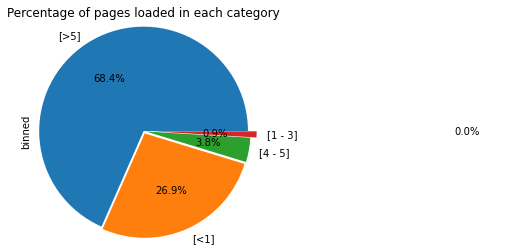

In [8]:
top_10_url = perf_df.sort_values(by=['Total'],ascending=False)

top10_df= top_10_url.head(10)
top10_df.reset_index(drop=True, inplace=True)
top10_df = top10_df.style.background_gradient()

dfi.export(top10_df,"/Users/dineshpandiyan/Desktop/Defects/Top_10urls.png")
#print(top10_df)

plot = new_df.plot.pie(y='number of pages', title="Percentage of pages loaded in each category", legend=False, \
                           autopct='%1.1f%%', explode=(0, 0.03, 0.03, 0.1,3), radius =1.2, \
                           shadow= False, startangle=0)

plot.figure.savefig('/Users/dineshpandiyan/Desktop/Defects/dist_pie.png',transparent=True)

network_results_df = pd.read_csv('/Users/dineshpandiyan/Desktop/Defects/Network_results.csv',usecols=[0,1,2], header=0)
network_results_df.columns=['Parent url', 'child url', 'Response']
network_sum_df = network_results_df.groupby(['Parent url']).count()

network_sum_df = network_sum_df.sort_values(by=['child url'],ascending=False)

network_sum_df = network_sum_df.head(10)
network_sum_df = network_sum_df.drop(columns=['Response'])
network_sum_df.rename(columns={'Parent url':'Parent url',
                          'child url':'Number of requests'}, 
                 inplace=True)
network_sum_df = network_sum_df.style.background_gradient()
dfi.export(network_sum_df,"/Users/dineshpandiyan/Desktop/Defects/Number_of_req.png")

#print(network_sum_df)

In [9]:
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch

c = canvas.Canvas("/Users/dineshpandiyan/Desktop/Defects/Broken link checker/test.pdf")
# move the origin up and to the left
#c.translate(inch,inch)
c.setPageSize((400, 400))
c.drawImage("/Users/dineshpandiyan/Desktop/Defects/grey.jpg", 0, 0, 400, 400)
c.setFont("Times-Roman", 25)
c.drawString(10, 340, "Test Report!")
c.setFont("Times-Roman", 12)
c.setFillColorRGB(1,0,0)
#c.setTitle("test")

c.line(0, 330, 300, 330)
c.setFont("Helvetica", 8)
c.drawString(250, 345, "Total number of links processed: "+str(perf_df.shape[0]))
c.drawString(250, 335, "Total number of broken links: "+str(bl_updated_df.shape[0]))
c.setFillColorRGB(1,0,1)
c.drawString(10, 300, "     Top 10 URLs with highest page load time (sec)")
c.drawString(40, 155, "     Stats")
c.drawString(220, 152, "     Top 10 URLs with highest number of req")
c.setFillGray(0.90)

c.drawImage("/Users/dineshpandiyan/Desktop/Defects/Top_10urls.png", 10, 180, 200, 100, mask='auto')
c.drawImage("/Users/dineshpandiyan/Desktop/Defects/Desc_stats.png", 30, 40, 75, 100, mask='auto')
c.drawImage("/Users/dineshpandiyan/Desktop/Defects/dist_pie.png", 200, 160, 200, 150, mask='auto')
c.drawImage("/Users/dineshpandiyan/Desktop/Defects/Number_of_req.png", 200, 25, 200, 120, mask='auto')

c.showPage()
c.save()